# Boundary Extraction

Since we are not using all of Zambia, I need to extract the boundaries that are used in the analysis 


https://gaez.fao.org/datasets/hqfao::agro-ecological-regions-of-zambia/about

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
# Define the file path
file_path = "data/Agro-ecological_regions_of_Zambia.geojson"

# Read the GeoJSON file
zambia_gdf = gpd.read_file(file_path)
print(zambia_gdf)

   FID AGRO_ECOL_  COUNT_  Area   Shape__Area  Shape__Length  \
0    1          I      21     0  1.292624e+11   3.349991e+06   
1    2        IIB      28     0  2.111927e+11   4.171581e+06   
2    3        IIA       9     0  9.022669e+10   1.342373e+06   
3    4        III      34     0  3.594558e+11   4.797582e+06   

                                            geometry  
0  POLYGON ((25.14211 -16.02023, 25.19182 -16.014...  
1  POLYGON ((30.21369 -15.02084, 30.19653 -15.053...  
2  POLYGON ((24.61594 -13.98126, 24.62871 -13.982...  
3  POLYGON ((29.57520 -8.37850, 29.58835 -8.37677...  


<Axes: >

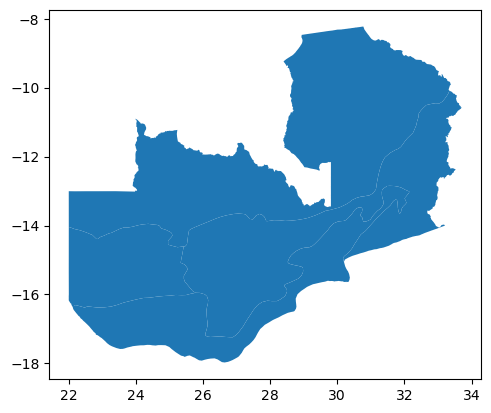

In [5]:
zambia_gdf.plot()

### Boundaries 

We will only use agro-ecological zones I, IIa, and IIb. We will exclude III since droughts do not affect the North as severely as the South. 

   FID AGRO_ECOL_  COUNT_  Area   Shape__Area  Shape__Length  \
0    1          I      21     0  1.292624e+11   3.349991e+06   
1    2        IIB      28     0  2.111927e+11   4.171581e+06   
2    3        IIA       9     0  9.022669e+10   1.342373e+06   

                                            geometry  
0  POLYGON ((25.14211 -16.02023, 25.19182 -16.014...  
1  POLYGON ((30.21369 -15.02084, 30.19653 -15.053...  
2  POLYGON ((24.61594 -13.98126, 24.62871 -13.982...  


<Axes: >

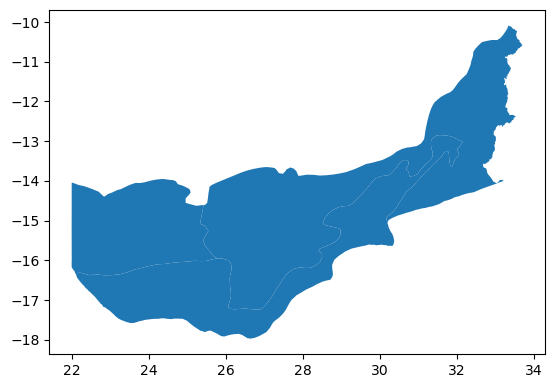

In [6]:
# Filter for the regions I, IIB, and IIA
selected_zones = zambia_gdf[zambia_gdf["AGRO_ECOL_"].isin(["I", "IIB", "IIA"])]

# Display the filtered regions
print(selected_zones)

# Plot the selected regions (optional)
selected_zones.plot()


### Outer Boundary

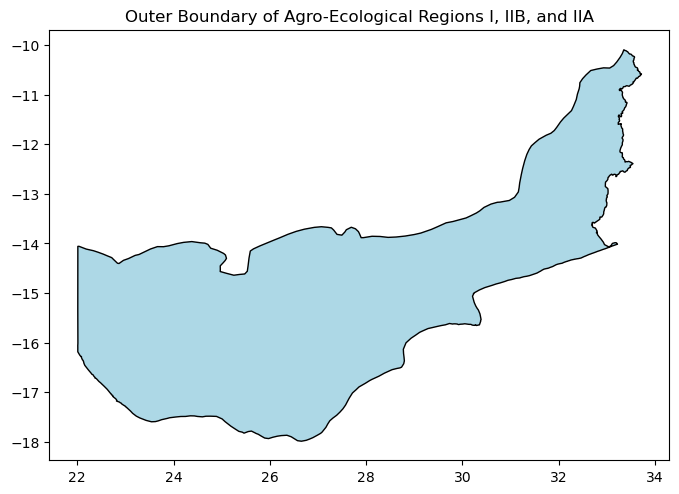

In [8]:
# Dissolve the internal boundaries to create a single outer boundary
outer_boundary = selected_zones.dissolve()

# Plot the result
fig, ax = plt.subplots(figsize=(8, 6))
outer_boundary.plot(ax=ax, color="lightblue", edgecolor="black")
ax.set_title("Outer Boundary of Agro-Ecological Regions I, IIB, and IIA")
plt.show()


In [9]:
# Define the output file path for export
output_path = "data/Agro_ecological_regions_Zambia_outer_boundary.geojson"

# Save the dissolved (outer boundary) as a new GeoJSON file
outer_boundary.to_file(output_path, driver="GeoJSON")

# Confirm successful export
print(f"Exported outer boundary to {output_path}")


Exported outer boundary to data/Agro_ecological_regions_Zambia_outer_boundary.geojson
